In [1]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.tokenize import TreebankWordTokenizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Loading Data

In [2]:
!pwd

/Users/holyspirit/CivicDataLab/pratham-books-story-level-analysis-master/data


In [3]:
# After removing the first comma on the header
!head -1 stories.csv

story_id,title,english_title,reading_level_updated,story_langugage,synopsis,content,category_name,tag_name,story_original_title


In [4]:
# Load the data into a dataframe
stories = pd.read_csv('stories.csv', delimiter=',')
stories.head()

,story_id,title,english_title,reading_level_updated,story_langugage,synopsis,content,category_name,tag_name,story_original_title
0,1,वह हँस दिया,Veh Hans Diyaa,L1,Hindi,क्‍या आपको दौड़ लगाने में मज़ा आता है? हमारी कहा...,Kitchenvadoekdiscl ClothesT-hemp&nbsp;&nbsp;&n...,"Fiction, Family & Friends, Animal Stories",NaN,वह हँस दिया
1,2,Smile Please!,Smile Please!,L1,English,Follow the young deer as he races along with f...,A fawn was racing in the forest. He was ahead ...,"Fiction, Family & Friends, Animal Stories, Ani...",NaN,वह हँस दिया
5,7,Fat King Thin Dog,Fat King Thin Dog,L1,English,Run along with the Fat King after the Thin Dog!,This is a fat king. The fat king has a thin do...,"Fiction, Funny, Animal Stories",NaN,Fat King Thin Dog
6,8,मोटा राजा दुबला कुत्ता,Mota Raja Dubla Kutta,L1,Hindi,मोटे राजा के साथ दुबले कुत्ते के पीछे भागिये!\r\n,यह है मोटा राजा। मोटे राजा का है दुबला कुत्ता...,"Fiction, Funny, Animal Stories, Animal Stories...",NaN,Fat King Thin Dog
14,16,"Vayu, the Wind","Vayu, the Wind",L2,English,A nice story about this silent and always pres...,"Everytime I finish my hot, hot bath,My wet bod...","Science & Nature, Poems, Poems, Science & Nature",NaN,वारा


In [5]:
# Ref : https://github.com/DataKind-BLR/PrathamBooks-Sprint-2018/blob/master/python/scripts/clean_stories_data.py
# Returns no. of rows and columns
stories.shape

(3697, 10)

In [6]:
# Total number of unique stories
stories.story_id.nunique()

3697

# Data Pre-processing

In [7]:
not_null_index = stories.index[stories['content'].notnull()]
len(not_null_index)

3640

In [8]:
analysis = stories[['story_id','title','content','reading_level_updated']]
analysis['content_length'] = analysis['content'].str.len()
analysis
#analysis.to_csv('story.csv',index=False)

/Users/holyspirit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,story_id,title,content,reading_level_updated,content_length
0,1,वह हँस दिया,Kitchenvadoekdiscl ClothesT-hemp&nbsp;&nbsp;&n...,L1,3972.0
1,2,Smile Please!,A fawn was racing in the forest. He was ahead ...,L1,542.0
5,7,Fat King Thin Dog,This is a fat king. The fat king has a thin do...,L1,271.0
6,8,मोटा राजा दुबला कुत्ता,यह है मोटा राजा। मोटे राजा का है दुबला कुत्ता...,L1,279.0
14,16,"Vayu, the Wind","Everytime I finish my hot, hot bath,My wet bod...",L2,965.0
16,21,Chuskit Goes to School!,Chuskit woke up early that morning. It was a v...,L3,8984.0
18,33,"Not Now, Not Now!","&nbsp;I asked Ajji, “May I please have some la...",L1,887.0
19,34,"अभी नहीं, अभी नहीं!","मैंने अज्जी से पूछा, “क्या मैं कुछ लड्डू खा लू...",L1,832.0
22,37,"ఇప్పుడు కాదు, ఇప్పుడు కాదు!","అవ్వని అడిగాను, “నాకు ఒక్క లడ్డూ ఇవ్వవా?” “ఇప్...",L1,934.0
23,38,Counting on Moru,Moru had strong likes and dislikes. When he li...,L3,10496.0


### Data Cleaning

In [9]:
# Remove semicolons,new lines, non-breaking space, carriage returns and tabs from page_content
analysis.content = analysis.content.str.replace(";", " ")
analysis.content = analysis.content.str.replace("\n", " ")
analysis.content = analysis.content.str.replace("&nbsp", " ")
analysis.content = analysis.content.str.replace("\t", " ")
analysis.content = analysis.content.str.replace("\r", " ")
analysis

/Users/holyspirit/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,story_id,title,content,reading_level_updated,content_length
0,1,वह हँस दिया,Kitchenvadoekdiscl ClothesT-hemp K...,L1,3972.0
1,2,Smile Please!,A fawn was racing in the forest. He was ahead ...,L1,542.0
5,7,Fat King Thin Dog,This is a fat king. The fat king has a thin do...,L1,271.0
6,8,मोटा राजा दुबला कुत्ता,यह है मोटा राजा। मोटे राजा का है दुबला कुत्ता...,L1,279.0
14,16,"Vayu, the Wind","Everytime I finish my hot, hot bath,My wet bod...",L2,965.0
16,21,Chuskit Goes to School!,Chuskit woke up early that morning. It was a v...,L3,8984.0
18,33,"Not Now, Not Now!","I asked Ajji, “May I please have some laddoo...",L1,887.0
19,34,"अभी नहीं, अभी नहीं!","मैंने अज्जी से पूछा, “क्या मैं कुछ लड्डू खा लू...",L1,832.0
22,37,"ఇప్పుడు కాదు, ఇప్పుడు కాదు!","అవ్వని అడిగాను, “నాకు ఒక్క లడ్డూ ఇవ్వవా?” “ఇప్...",L1,934.0
23,38,Counting on Moru,Moru had strong likes and dislikes. When he li...,L3,10496.0


In [10]:
# Removing null content
# To remove the element with missing values use dropna()

filtered_content = analysis[(analysis.content.notnull())]
filtered_content
#Result : From 3697 rows to 3640 rows

,story_id,title,content,reading_level_updated,content_length
0,1,वह हँस दिया,Kitchenvadoekdiscl ClothesT-hemp K...,L1,3972.0
1,2,Smile Please!,A fawn was racing in the forest. He was ahead ...,L1,542.0
5,7,Fat King Thin Dog,This is a fat king. The fat king has a thin do...,L1,271.0
6,8,मोटा राजा दुबला कुत्ता,यह है मोटा राजा। मोटे राजा का है दुबला कुत्ता...,L1,279.0
14,16,"Vayu, the Wind","Everytime I finish my hot, hot bath,My wet bod...",L2,965.0
16,21,Chuskit Goes to School!,Chuskit woke up early that morning. It was a v...,L3,8984.0
18,33,"Not Now, Not Now!","I asked Ajji, “May I please have some laddoo...",L1,887.0
19,34,"अभी नहीं, अभी नहीं!","मैंने अज्जी से पूछा, “क्या मैं कुछ लड्डू खा लू...",L1,832.0
22,37,"ఇప్పుడు కాదు, ఇప్పుడు కాదు!","అవ్వని అడిగాను, “నాకు ఒక్క లడ్డూ ఇవ్వవా?” “ఇప్...",L1,934.0
23,38,Counting on Moru,Moru had strong likes and dislikes. When he li...,L3,10496.0


In [11]:
filtered_content.story_id.nunique()

3640

### Comparison between English and an Indian Language

In [12]:
#Resource 'corpora/udhr'
#nltk.download()

In [13]:
import nltk
from nltk.corpus import udhr
# Only Hindi and English languages are present
nltk.corpus.udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

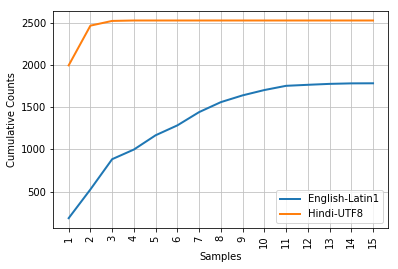

In [14]:
'''
REf : https://www.nltk.org/book/ch02.html

Cumulative Word Length Distributions : 

this graph shows that words having 4 or fewer letters account for about 
1000 words of English text and 3 or fewer letters account
for about 2500 words of Hindi text. '''
from nltk.corpus import udhr
languages = ['English-Latin1','Hindi-UTF8']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang))
cfd.plot(cumulative=True)

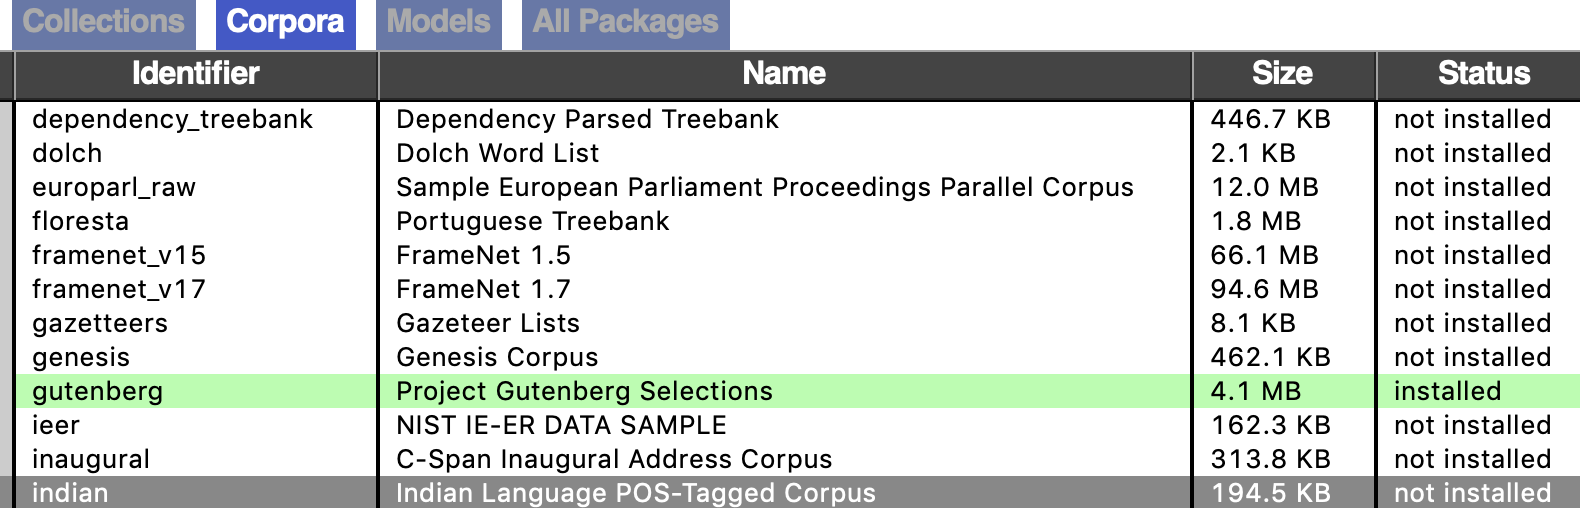

In [15]:
# Sentence Tokenization

filtered_content['content_sent'] = filtered_content['content'].apply(nltk.sent_tokenize)

/Users/holyspirit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Word Tokenization

tokenizer = TreebankWordTokenizer()
filtered_content['content_words'] = filtered_content['content'].apply(tokenizer.tokenize)

/Users/holyspirit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
!pip install wordcloud

## Visualization

In [18]:
#  Word cloud 
words = str(filtered_content['content_words'])
wordcloud = WordCloud().generate(words)

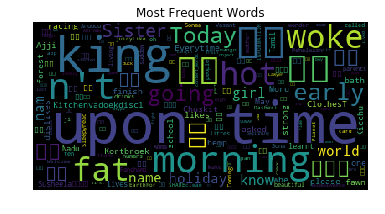

In [19]:
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words')
plt.axis("off")
plt.show()

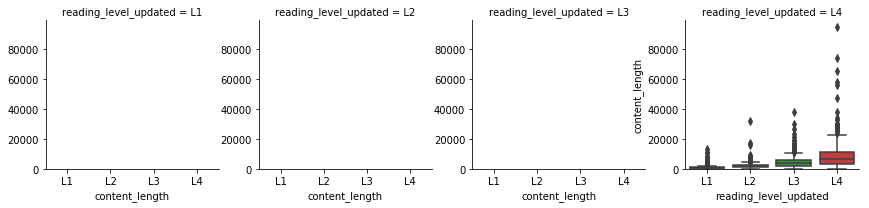

In [20]:
g = sns.FacetGrid(data=filtered_content, col='reading_level_updated')
g.map(plt.hist, 'content_length', bins=50)
sns.boxplot(x='reading_level_updated', y='content_length', data=analysis)

In [21]:
filtered_content

,story_id,title,content,reading_level_updated,content_length,content_sent,content_words
0,1,वह हँस दिया,Kitchenvadoekdiscl ClothesT-hemp K...,L1,3972.0,[Kitchenvadoekdiscl ClothesT-hemp ...,"[Kitchenvadoekdiscl, ClothesT-hemp, Kortbroek,..."
1,2,Smile Please!,A fawn was racing in the forest. He was ahead ...,L1,542.0,"[A fawn was racing in the forest., He was ahea...","[A, fawn, was, racing, in, the, forest., He, w..."
5,7,Fat King Thin Dog,This is a fat king. The fat king has a thin do...,L1,271.0,"[This is a fat king., The fat king has a thin ...","[This, is, a, fat, king., The, fat, king, has,..."
6,8,मोटा राजा दुबला कुत्ता,यह है मोटा राजा। मोटे राजा का है दुबला कुत्ता...,L1,279.0,[यह है मोटा राजा। मोटे राजा का है दुबला कुत्त...,"[यह, है, मोटा, राजा।, मोटे, राजा, का, है, दुबल..."
14,16,"Vayu, the Wind","Everytime I finish my hot, hot bath,My wet bod...",L2,965.0,"[Everytime I finish my hot, hot bath,My wet bo...","[Everytime, I, finish, my, hot, ,, hot, bath, ..."
16,21,Chuskit Goes to School!,Chuskit woke up early that morning. It was a v...,L3,8984.0,"[Chuskit woke up early that morning., It was a...","[Chuskit, woke, up, early, that, morning., It,..."
18,33,"Not Now, Not Now!","I asked Ajji, “May I please have some laddoo...",L1,887.0,"[ I asked Ajji, “May I please have some laddo...","[I, asked, Ajji, ,, “, May, I, please, have, s..."
19,34,"अभी नहीं, अभी नहीं!","मैंने अज्जी से पूछा, “क्या मैं कुछ लड्डू खा लू...",L1,832.0,"[मैंने अज्जी से पूछा, “क्या मैं कुछ लड्डू खा ल...","[मैंने, अज्जी, से, पूछा, ,, “, क्या, मैं, कुछ,..."
22,37,"ఇప్పుడు కాదు, ఇప్పుడు కాదు!","అవ్వని అడిగాను, “నాకు ఒక్క లడ్డూ ఇవ్వవా?” “ఇప్...",L1,934.0,"[అవ్వని అడిగాను, “నాకు ఒక్క లడ్డూ ఇవ్వవా?” “ఇప...","[అవ్వని, అడిగాను, ,, “, నాకు, ఒక్క, లడ్డూ, ఇవ్..."
23,38,Counting on Moru,Moru had strong likes and dislikes. When he li...,L3,10496.0,"[Moru had strong likes and dislikes., When he ...","[Moru, had, strong, likes, and, dislikes., Whe..."
